#  Introduction to Machine Learning — 2024/2025 Evolutionary Algorithms

In [50]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import statistics


### Exercise 1


1. Build the simulation environment. Develop the following functionalities:

a) Create a function that produces a random bit pattern of a specific size (the bit pattern may be coded as a string of 0s and 1s)

In [51]:
def createRandIntPattern(length):
    stringWithIntPattern = ""
    for i in range(length):
        integer = random.randint(0,1)
        stringWithIntPattern += str(integer)

    return(stringWithIntPattern)

b) Create a function that will generate random patterns and measure how many attempts and how much time it takes to generate the “correct” bit pattern. 

Make two graphs on the evolution of attempts / time vs the number of bits in the pattern (2, 4, 8, 12, 16, ...). Each “point” in the graph should be a box-plot based on the results of 30 trials. 

Use a fixed set of seeds to be able to reproduce the experiments. 

In [52]:
def regenerateBitPattern(correctBitPattern):
    startTime = time.time()
    count = 0
    length = len(correctBitPattern)
    generatedBitPattern = createRandIntPattern(length)
    while generatedBitPattern != correctBitPattern:
        generatedBitPattern = createRandIntPattern(length)
        count += 1
    endTime = time.time()
    executionTime = endTime - startTime

    return (count, executionTime)

In [ ]:
def getAverageCountsAndTimes(listNumberBits, searchTechnique, giveMeans = False):
    allBitesAllCounts = []
    allBitesAllExecutionTimes = []
    for numberBits in listNumberBits:
        random.seed(13000)
        correctBitPattern = createRandIntPattern(numberBits)
        lengthBitPattern = len(correctBitPattern)
        oneBiteAllCounts = []
        oneBiteAllExecutionTimes = []
        for i in range(30):
            if searchTechnique == "random":
                count, executionTime = regenerateBitPattern(correctBitPattern)
            elif searchTechnique == "mutationRandom":
                randomBitPattern = createRandIntPattern(lengthBitPattern)
                randomBitPattern, count, fitness, executionTime = getCorrectPatternWithMutations(correctBitPattern, randomBitPattern, onlyFitterMutations = False)
            elif searchTechnique == "mutationIfBetter":
                randomBitPattern = createRandIntPattern(lengthBitPattern)
                randomBitPattern, count, fitness, executionTime = getCorrectPatternWithMutations(correctBitPattern, randomBitPattern, onlyFitterMutations = True)
            else:
                print("please choose a valid option: 'random', 'mutationRandom', 'mutationIfBetter' or 'crossover' ")
            oneBiteAllCounts.append(count)
            oneBiteAllExecutionTimes.append(executionTime)
        allBitesAllCounts.append(oneBiteAllCounts)
        allBitesAllExecutionTimes.append(oneBiteAllExecutionTimes)

    # give mean attempt number and execution time 
    if giveMeans == True:
        meansOfAttempts = []
        print("Mean number attempts:")
        for listWithItems in allBitesAllCounts:
            mean = statistics.mean(listWithItems)
            print(round(mean, 0))
            meansOfAttempts.append(mean)

        meansOfExecutionTimes = []
        print("Mean execution time:")
        for listWithItems in allBitesAllExecutionTimes:
            mean = statistics.mean(listWithItems)
            print(round(mean, 4))
            meansOfExecutionTimes.append(mean)

        return (allBitesAllCounts, allBitesAllExecutionTimes, meansOfAttempts, meansOfExecutionTimes)
    
    return (allBitesAllCounts, allBitesAllExecutionTimes)

In [54]:
# give mean attempt number and execution time

listNumberBits = [2, 4, 8, 12, 14, 16]
allBitesAllCountsRandom, allBitesAllExecutionTimesRandom,  meansOfAttemptsRandom, meansOfExecutionTimesRandom = getAverageCountsAndTimes(listNumberBits = listNumberBits, searchTechnique = "random", giveMeans = True) 

Mean number attempts:
3.0
15.0
246.0
3516.0
24804.0
59254.0
Mean execution time:
0.0
0.0001
0.0029
0.0321
0.2524
0.673


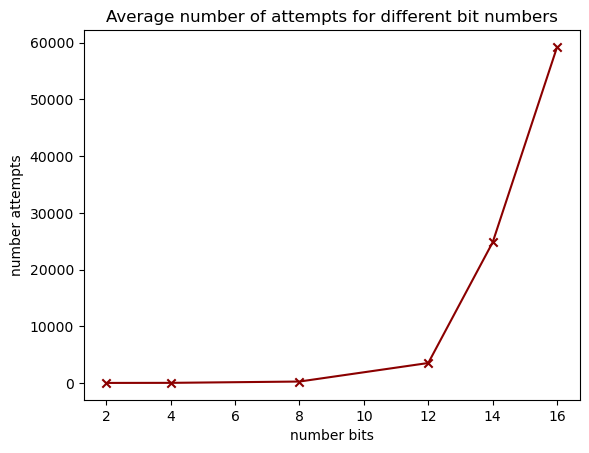

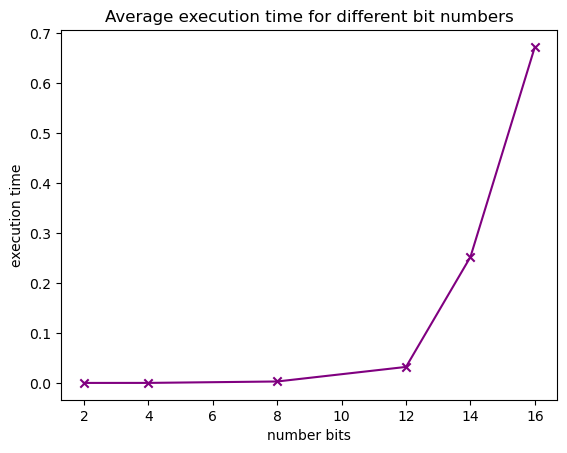

In [55]:
# show in graph
def plotGraph(yCoordinate, title, yLabel, listNumberBits = listNumberBits, colour = "darkred"):
    plt.plot(listNumberBits, yCoordinate, c=colour)
    plt.scatter(listNumberBits, yCoordinate, c=colour, marker='x')
    plt.title(title)
    plt.xlabel("number bits")
    plt.ylabel(yLabel)
    plt.show()

plotGraph(yCoordinate = meansOfAttemptsRandom, title = 'Average number of attempts for different bit numbers', yLabel = "number attempts", colour = "darkred")
plotGraph(yCoordinate = meansOfExecutionTimesRandom, title = 'Average execution time for different bit numbers', yLabel = "execution time", listNumberBits = listNumberBits, colour = "purple")


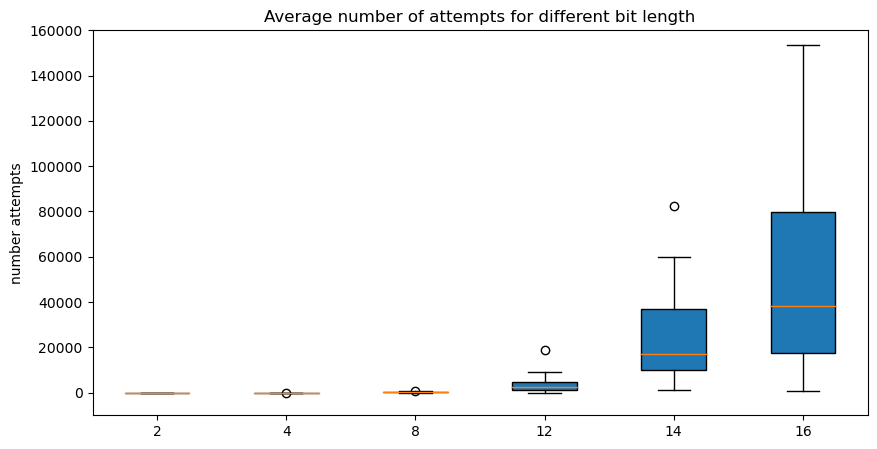

In [56]:
# visualise attempts
def plotBoxplot(boxBlotContent, title, yLabel, labels = listNumberBits, yLim = None):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    bplot = ax.boxplot(boxBlotContent, 
                    labels = listNumberBits, 
                    patch_artist=True,
                    whis=1.5)
    if yLim != None: 
        ax.set_ylim(yLim)

    plt.show()

plotBoxplot(boxBlotContent = allBitesAllCountsRandom, title = 'Average number of attempts for different bit length', yLabel = "number attempts", labels = listNumberBits, yLim = [-10000, 160000])

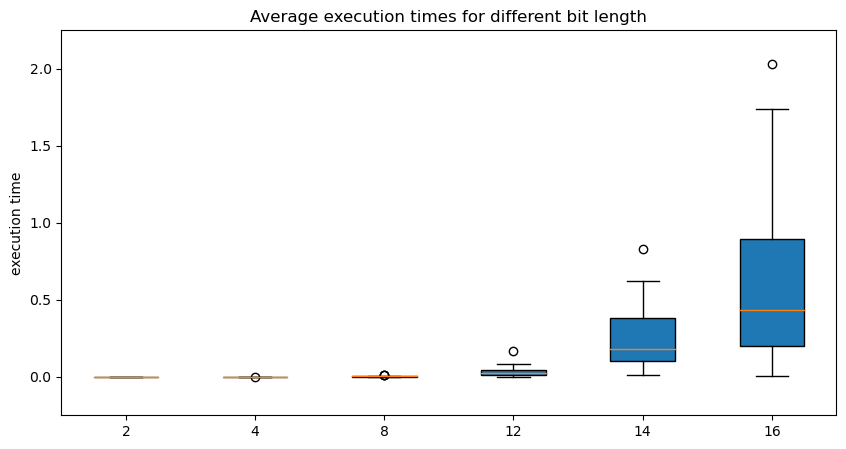

In [57]:
plotBoxplot(boxBlotContent = allBitesAllExecutionTimesRandom, title = 'Average execution times for different bit length', yLabel = "execution time", labels = listNumberBits, yLim = [-0.25, 2.25])

c) Create a function that measures the “fitness” of the guessed pattern.This function should have a maximum value when the guessed pattern matches exactly the “correct” pattern and decreases as the distance between patterns increases.

In [58]:
def measureFitness(correctBitPattern, randomBitPattern):
    totalCorectBits = 0
    totalLengthBitPattern = len(correctBitPattern)
    for position in range(totalLengthBitPattern):
        if correctBitPattern[position] == randomBitPattern[position]:
            totalCorectBits += 1
    # normalise
    normalisedFitness = totalCorectBits/totalLengthBitPattern

    return(normalisedFitness)

# test function
correctBitPattern = createRandIntPattern(16)
randomBitPattern = createRandIntPattern(len(correctBitPattern))
measureFitness(correctBitPattern, randomBitPattern)

0.5

d) Create a function to mutate (flip one bit) a given pattern. Use this function in a loop where the change is accepted only if it generates a better solution (i.e., a solution with higher fitness). Stop after 1000 mutations or when the pattern generated by mutation is equal to the solution. Does it always converge to the correct solution?

In [59]:
def mutateBit(randomBitPattern):
    totalLengthBitPattern = len(randomBitPattern)-1 # -1, because randint includes last integer also
    positionToMutate = random.randint(0, totalLengthBitPattern)
    randomBitPatternMutate = list(randomBitPattern)
    # mutate 
    if randomBitPatternMutate[positionToMutate] == "0":
        randomBitPatternMutate[positionToMutate] = "1"
    elif randomBitPatternMutate[positionToMutate] == "1":
        randomBitPatternMutate[positionToMutate] = "0"
    else:
        print("how possible, neither 0, nor 1")
    
    randomBitPatternMutate = "".join(randomBitPatternMutate)
    return(randomBitPatternMutate)

def mutateIfBetterFitness(correctBitPattern, randomBitPattern):
    randomBitPatternMutate = mutateBit(randomBitPattern)
    # check if solution is better
    fitnessWithoutMutation = measureFitness(correctBitPattern, randomBitPattern)
    fitnessWithMutation = measureFitness(correctBitPattern, randomBitPatternMutate)
    if fitnessWithMutation >= fitnessWithoutMutation:
        randomBitPattern = randomBitPatternMutate
    
    return(randomBitPattern)

In [60]:
lengthBitPattern = 16
correctBitPattern = createRandIntPattern(lengthBitPattern)
#print(f"Goal bit pattern: {correctBitPattern}")
randomBitPattern = createRandIntPattern(lengthBitPattern)

def getCorrectPatternWithMutations(correctBitPattern, randomBitPattern, onlyFitterMutations = True, maxNumberMutations = 1000):
    startTime = time.time()
    fitness = []
    count = 0
    while correctBitPattern != randomBitPattern and count < maxNumberMutations:
        fitness.append(measureFitness(correctBitPattern, randomBitPattern))
        if onlyFitterMutations == True:
            randomBitPattern = mutateIfBetterFitness(correctBitPattern, randomBitPattern)
        else: 
            randomBitPattern = mutateBit(randomBitPattern)
        count += 1
    endTime = time.time()
    executionTime = endTime - startTime
    fitness.append(measureFitness(correctBitPattern, randomBitPattern))

    return(randomBitPattern, count, fitness, executionTime)

# test function
randomBitPatternAllMutations, countAllMutations, fitnessAllMutations, executionTimeAllMutations = getCorrectPatternWithMutations(correctBitPattern, randomBitPattern, onlyFitterMutations = False)
randomBitPatternOnlyFitterMutations, countOnlyFitterMutations, fitnessOnlyFitterMutations, executionTimeOnlyFitterMutations = getCorrectPatternWithMutations(correctBitPattern, randomBitPattern, onlyFitterMutations = True)

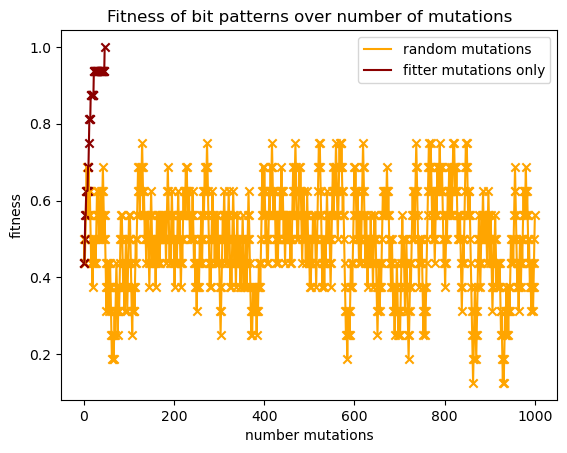

In [61]:
# visualise in graph
plt.plot(range(0, countAllMutations+1), fitnessAllMutations, c="orange", label = "random mutations")
plt.scatter(range(0, countAllMutations+1), fitnessAllMutations, c='orange', marker='x')
plt.plot(range(0, countOnlyFitterMutations+1), fitnessOnlyFitterMutations, c="darkred", label = "fitter mutations only")
plt.scatter(range(0, countOnlyFitterMutations+1), fitnessOnlyFitterMutations, c='darkred', marker='x')
plt.title('Fitness of bit patterns over number of mutations')
plt.xlabel("number mutations")
plt.ylabel("fitness")
plt.legend()
plt.show()


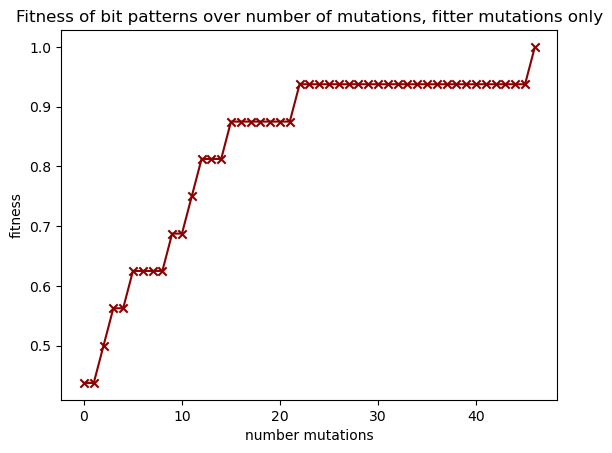

In [62]:
# visualise in graph
plt.plot(range(0, countOnlyFitterMutations+1), fitnessOnlyFitterMutations, c="darkred")
plt.scatter(range(0, countOnlyFitterMutations+1), fitnessOnlyFitterMutations, c='darkred', marker='x')
plt.title('Fitness of bit patterns over number of mutations, fitter mutations only')
plt.xlabel("number mutations")
plt.ylabel("fitness")
plt.show()

In [71]:
# get runtime and attempts over 30 rounds for different bits
allBitesAllCountsMutationRandom, allBitesAllExecutionTimesMutationRandom, meansOfAttemptsMutationRandom, meansOfExecutionTimesMutationRandom = getAverageCountsAndTimes(listNumberBits = listNumberBits, searchTechnique = "mutationRandom", giveMeans=True) 

Mean number attempts:
4.0
18.0
242.0
940.0
968.0
1000
Mean execution time:
0.0
0.0
0.0008
0.0025
0.0027
0.003


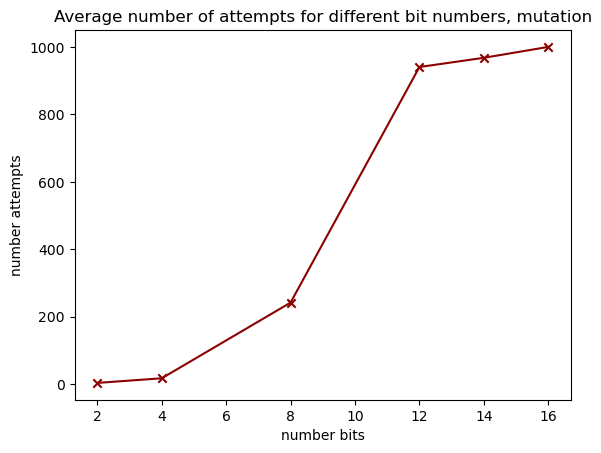

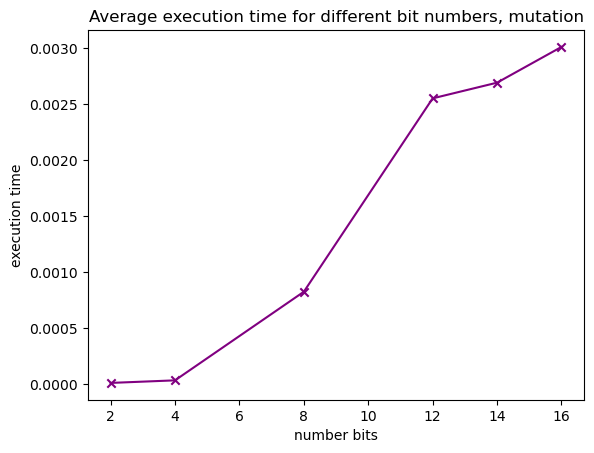

In [72]:
plotGraph(yCoordinate = meansOfAttemptsMutationRandom, title = 'Average number of attempts for different bit numbers, mutation', yLabel = "number attempts", colour = "darkred")
plotGraph(yCoordinate = meansOfExecutionTimesMutationRandom, title = 'Average execution time for different bit numbers, mutation', yLabel = "execution time", listNumberBits = listNumberBits, colour = "purple")


In [73]:
# get runtime and attempts over 30 rounds for different bits
allBitesAllCountsMutationIfBetter, allBitesAllExecutionTimesMutationIfBetter, meansOfAttemptsMutationIfBetter, meansOfExecutionTimesMutationIfBetter = getAverageCountsAndTimes(listNumberBits = listNumberBits, searchTechnique = "mutationIfBetter", giveMeans=True) 

Mean number attempts:
1.0
6.0
17.0
28.0
33.0
40.0
Mean execution time:
0.0
0.0
0.0001
0.0002
0.0002
0.0004


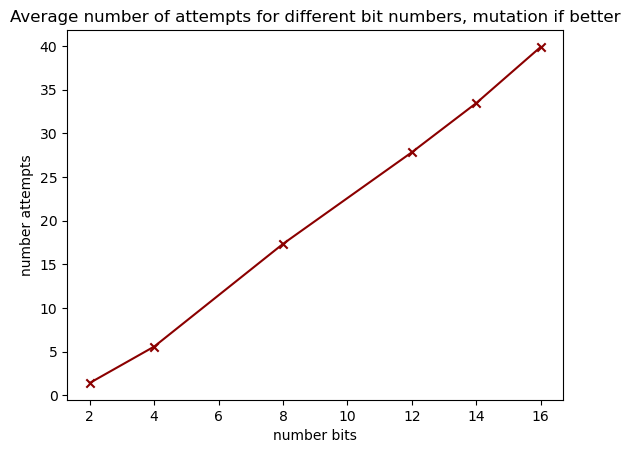

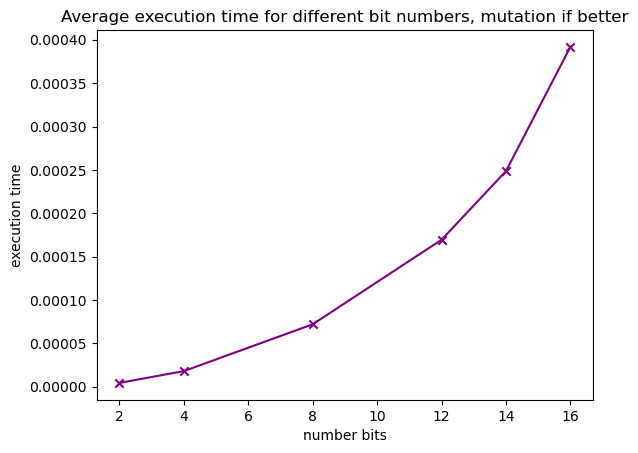

In [74]:
plotGraph(yCoordinate = meansOfAttemptsMutationIfBetter, title = 'Average number of attempts for different bit numbers, mutation if better', yLabel = "number attempts", colour = "darkred")
plotGraph(yCoordinate = meansOfExecutionTimesMutationIfBetter, title = 'Average execution time for different bit numbers, mutation if better', yLabel = "execution time", listNumberBits = listNumberBits, colour = "purple")


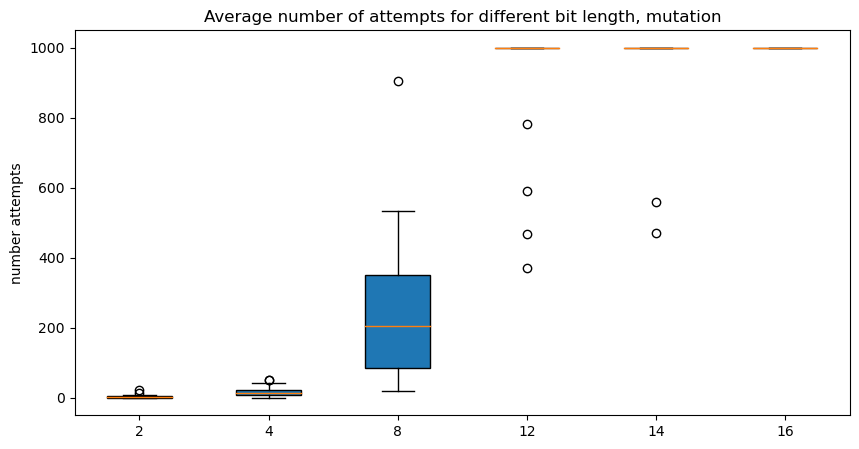

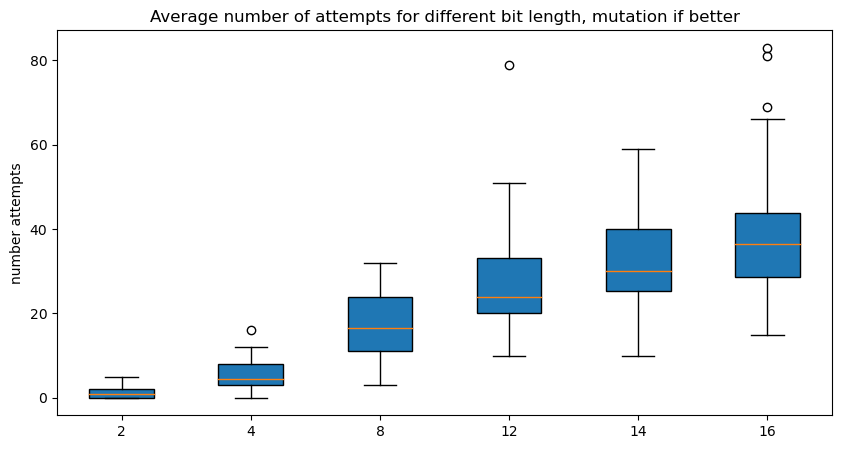

In [75]:
plotBoxplot(boxBlotContent = allBitesAllCountsMutationRandom, title = 'Average number of attempts for different bit length, mutation', yLabel = "number attempts", labels = listNumberBits)
plotBoxplot(boxBlotContent = allBitesAllCountsMutationIfBetter, title = 'Average number of attempts for different bit length, mutation if better', yLabel = "number attempts", labels = listNumberBits)

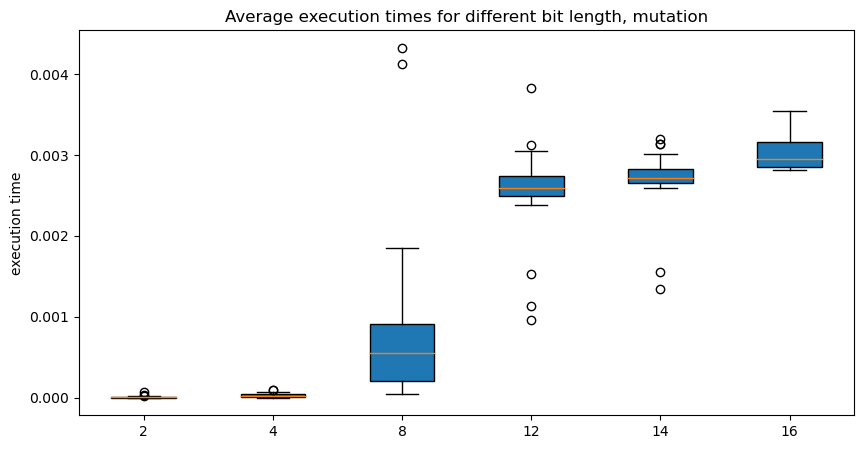

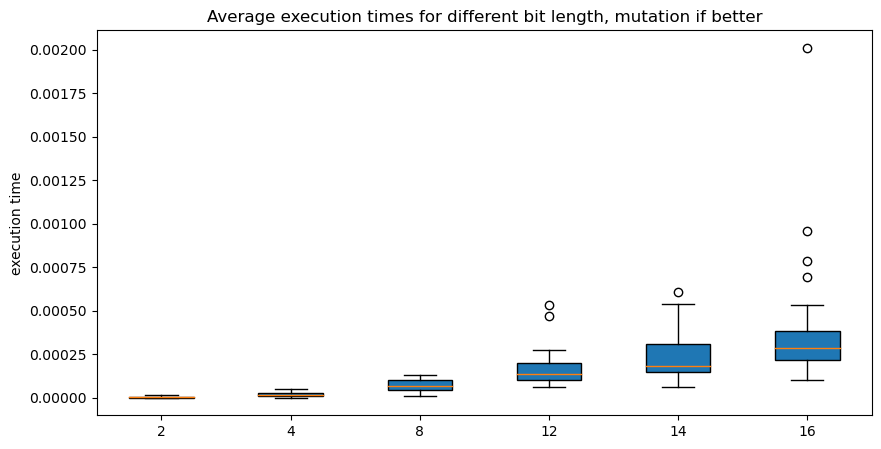

In [76]:
plotBoxplot(boxBlotContent = allBitesAllExecutionTimesMutationRandom, title = 'Average execution times for different bit length, mutation', yLabel = "execution time", labels = listNumberBits)
plotBoxplot(boxBlotContent = allBitesAllExecutionTimesMutationIfBetter, title = 'Average execution times for different bit length, mutation if better', yLabel = "execution time", labels = listNumberBits)

2. Generate a random set of patterns (a population, for example, 100 patterns) and evaluate each of the patterns. 
Select the best 30% and, based on them generate by mutation a new set of 100: 30% of the population corresponds to the 30% best and the remaining 70% are the ones generated by mutation. Repeat the processes until the best evaluation stagnates. Compare fairly the search methods tested so far, including their run-times. Always use 30 tests for each result. Boxplots with whiskers are a good option to compare the results distribution for the several tests.

In [78]:
lengthBitPattern = 16
correctBitPattern = createRandIntPattern(lengthBitPattern)
print(f"Goal bit pattern: {correctBitPattern}")

population = []
for i in range(100):
    individualBitPattern = createRandIntPattern(lengthBitPattern)
    population.append(individualBitPattern)

Goal bit pattern: 1001000010001011


In [81]:
def getBestFitnessIndividuals(listWithSeveralIndividuals, correctBitPattern, percentageBest = 0.3):
    allFitnesses = []
    for individual in listWithSeveralIndividuals:
        fitness = measureFitness(correctBitPattern, individual)
        allFitnesses.append(fitness)

    dictPositionToIndividual = {}
    dictPositionToFitness = {}
    for i in range(len(population)):
        dictPositionToIndividual[i] = listWithSeveralIndividuals[i]
        dictPositionToFitness[i] = allFitnesses[i]

    sortedDictByFitness = sorted(dictPositionToFitness, key = dictPositionToFitness.get, reverse = True)
    bestPercent = int(len(sortedDictByFitness)*percentageBest)
    bestFitnessPositions = sortedDictByFitness[:bestPercent]

    # get best individuals
    bestPcIndividuals = []
    for position in range(len(bestFitnessPositions)):
        bestPcIndividuals.append(dictPositionToIndividual[bestFitnessPositions[position]])

    return (bestPcIndividuals)

def mutatePopulationFromBestIndividuals(listWithBestIndividuals, percentageBest = 0.3):
    numberOfNewIndividualsNeeded = int((len(listWithBestIndividuals) / percentageBest) - len(listWithBestIndividuals))

    fullNewPopulation = []
    for i in range(len(listWithBestIndividuals)):
        fullNewPopulation.append(listWithBestIndividuals[i])

    for i in range(numberOfNewIndividualsNeeded):
        positionIndividualToMutate = random.randint(0, len(listWithBestIndividuals)-1)
        newIndividual = mutateBit(listWithBestIndividuals[positionIndividualToMutate])
        fullNewPopulation.append(newIndividual)

    return (fullNewPopulation)

def mutateIfBetterPopulationFromBestIndividuals(correctBitPattern, listWithBestIndividuals, percentageBest = 0.3):
    numberOfNewIndividualsNeeded = int((len(listWithBestIndividuals) / percentageBest) - len(listWithBestIndividuals))

    fullNewPopulation = []
    for i in range(len(listWithBestIndividuals)):
        fullNewPopulation.append(listWithBestIndividuals[i])

    for i in range(numberOfNewIndividualsNeeded):
        positionIndividualToMutate = random.randint(0, len(listWithBestIndividuals)-1)
        newIndividual = mutateIfBetterFitness(correctBitPattern, listWithBestIndividuals[positionIndividualToMutate])
        fullNewPopulation.append(newIndividual)

    return (fullNewPopulation)

def measureFitnessOfPopulation(listWithSeveralIndividuals, correctBitPattern):
    allFitnesses = []
    for individual in listWithSeveralIndividuals:
        allFitnesses.append(measureFitness(correctBitPattern, individual))
    
    averageFitnessPopulation = sum(allFitnesses)/len(allFitnesses)

    return (averageFitnessPopulation)

In [111]:
def runEvolution(correctBitPattern, listWithSeveralIndividuals,  onlyFitterMutations = False, maxNoImprovement = 5):

    maxNoImprovement = maxNoImprovement
    noImprovementCounter = 0 
    fitnessPopulation = []
    count = 0

    fitnessOldPopulation = measureFitnessOfPopulation(listWithSeveralIndividuals, correctBitPattern)
    listWithBestIndividuals = getBestFitnessIndividuals(listWithSeveralIndividuals, correctBitPattern)

    if onlyFitterMutations == True:
        fullNewPopulation = mutateIfBetterPopulationFromBestIndividuals(correctBitPattern, listWithBestIndividuals)
    else:
        fullNewPopulation = mutatePopulationFromBestIndividuals(listWithBestIndividuals)

    fitnessNewPopulation = measureFitnessOfPopulation(fullNewPopulation, correctBitPattern)

    while noImprovementCounter < maxNoImprovement:
        fitnessOldPopulation = fitnessNewPopulation
        listWithBestIndividuals = getBestFitnessIndividuals(fullNewPopulation, correctBitPattern)
        if onlyFitterMutations == True:
            fullNewPopulation = mutateIfBetterPopulationFromBestIndividuals(correctBitPattern, listWithBestIndividuals)
        else:
            fullNewPopulation = mutatePopulationFromBestIndividuals(listWithBestIndividuals)
        fitnessNewPopulation = measureFitnessOfPopulation(fullNewPopulation, correctBitPattern)

        if fitnessNewPopulation <= fitnessOldPopulation:
            noImprovementCounter += 1 

        fitnessPopulation.append(fitnessOldPopulation)
        count += 1
    fitnessPopulation.append(fitnessNewPopulation)

    return (count, fitnessPopulation)


In [113]:
runEvolution(correctBitPattern = correctBitPattern, listWithSeveralIndividuals = population, onlyFitterMutations = False, maxNoImprovement = 5)

(24,
 [0.616875,
  0.690625,
  0.746875,
  0.799375,
  0.82375,
  0.84625,
  0.864375,
  0.883125,
  0.898125,
  0.905,
  0.908125,
  0.920625,
  0.928125,
  0.931875,
  0.93375,
  0.93375,
  0.940625,
  0.943125,
  0.940625,
  0.945625,
  0.948125,
  0.94625,
  0.94875,
  0.948125,
  0.948125])

In [114]:
runEvolution(correctBitPattern = correctBitPattern, listWithSeveralIndividuals = population, onlyFitterMutations = True, maxNoImprovement = 5)

(13,
 [0.656875,
  0.74125,
  0.799375,
  0.844375,
  0.88125,
  0.896875,
  0.9425,
  0.956875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0])

In [103]:
# generate population randomly
def randomGenerationPopulationFromBestIndividuals(listWithBestIndividuals, percentageBest = 0.3):
    numberOfNewIndividualsNeeded = int((len(listWithBestIndividuals) / percentageBest) - len(listWithBestIndividuals))

    fullNewPopulation = []
    for i in range(len(listWithBestIndividuals)):
        fullNewPopulation.append(listWithBestIndividuals[i])

    for i in range(numberOfNewIndividualsNeeded):
        individualBitPattern = createRandIntPattern(lengthBitPattern)
        fullNewPopulation.append(individualBitPattern)

    return (fullNewPopulation)

def runEvolutionRandom(correctBitPattern, listWithSeveralIndividuals, maxNoImprovement = 5):

    maxNoImprovement = maxNoImprovement
    noImprovementCounter = 0 
    fitnessPopulation = []

    fitnessOldPopulation = measureFitnessOfPopulation(listWithSeveralIndividuals, correctBitPattern)
    listWithBestIndividuals = getBestFitnessIndividuals(listWithSeveralIndividuals, correctBitPattern)
    fullNewPopulation = randomGenerationPopulationFromBestIndividuals(listWithBestIndividuals, percentageBest = 0.3)
    fitnessNewPopulation = measureFitnessOfPopulation(fullNewPopulation, correctBitPattern)

    count = 0
    while noImprovementCounter < maxNoImprovement:
        fitnessOldPopulation = fitnessNewPopulation
        listWithBestIndividuals = getBestFitnessIndividuals(fullNewPopulation, correctBitPattern)
        fullNewPopulation = randomGenerationPopulationFromBestIndividuals(listWithBestIndividuals, percentageBest = 0.3)
        fitnessNewPopulation = measureFitnessOfPopulation(fullNewPopulation, correctBitPattern)

        if fitnessNewPopulation <= fitnessOldPopulation:
            noImprovementCounter += 1 
        
        fitnessPopulation.append(fitnessOldPopulation)
        count += 1
    fitnessPopulation.append(fitnessNewPopulation)
    return (count, fitnessPopulation)

runEvolutionRandom(correctBitPattern, population)

(9,
 [0.57125,
  0.56375,
  0.54875,
  0.56875,
  0.553125,
  0.573125,
  0.585,
  0.5475,
  0.5725,
  0.569375])

In [117]:
#compare mutation vs random generation

def comparePerformances(correctBitPattern, listWithSeveralIndividuals, typeOfLearning):
    
    startTime = time.time()

    if typeOfLearning == "random":
        count, fitnessPopulation = runEvolutionRandom(correctBitPattern, listWithSeveralIndividuals)
    elif typeOfLearning == "mutationRandom":
        count, fitnessPopulation = runEvolution(correctBitPattern, listWithSeveralIndividuals, onlyFitterMutations = False)
    elif typeOfLearning == "mutationIfBetter":
        count, fitnessPopulation = runEvolution(correctBitPattern, listWithSeveralIndividuals, onlyFitterMutations = True)
    elif typeOfLearning == "crossover":
        count, fitnessPopulation = runEvolutionCrossover(correctBitPattern, listWithSeveralIndividuals)
    
    endTime = time.time()
    executionTime = endTime - startTime

    return (count, executionTime, fitnessPopulation)

In [119]:
countRandom, timeRandom, popFitnessRandom = comparePerformances(correctBitPattern, population, typeOfLearning="random")
countMutationRandom, timeMutationRandom, popFitnessMutationRandom = comparePerformances(correctBitPattern, population, typeOfLearning="mutationRandom")
countMutationIfBetter, timeMutationIfBetter, popFitnessMutationIfBetter = comparePerformances(correctBitPattern, population, typeOfLearning="mutationIfBetter")


3. Design a crossover procedure for this type of pattern. Test it.

In [ ]:
def crossoverBit(bitOne, bitTwo):
    bitOne = list(bitOne)
    bitTwo = list(bitTwo)
    newCrossoverBit = []
    breakPoint = int(len(bitOne)/2)

    for i in range(len(bitTwo)):
        if i < breakPoint:
            newCrossoverBit.append(bitOne[i])
        else:
            newCrossoverBit.append(bitTwo[i])

    newCrossoverBit = "".join(newCrossoverBit)
    return (newCrossoverBit)

def crossoverPopulationFromBestIndividuals(listWithBestIndividuals, percentageBest = 0.3):
    numberOfNewIndividualsNeeded = int((len(listWithBestIndividuals) / percentageBest) - len(listWithBestIndividuals))

    fullNewPopulation = []
    for i in range(len(listWithBestIndividuals)):
        fullNewPopulation.append(listWithBestIndividuals[i])

    for i in range(numberOfNewIndividualsNeeded):
        firstPositionIndividualToMutate = random.randint(0, len(listWithBestIndividuals)-1)
        secondPositionIndividualToMutate = random.randint(0, len(listWithBestIndividuals)-1)
        newIndividual = crossoverBit(listWithBestIndividuals[firstPositionIndividualToMutate], listWithBestIndividuals[secondPositionIndividualToMutate])
        fullNewPopulation.append(newIndividual)

    return (fullNewPopulation)

In [98]:
def runEvolutionCrossover(correctBitPattern, listWithSeveralIndividuals, maxNoImprovement = 5):

    maxNoImprovement = maxNoImprovement
    noImprovementCounter = 0 

    fitnessOldPopulation = measureFitnessOfPopulation(listWithSeveralIndividuals, correctBitPattern)
    listWithBestIndividuals = getBestFitnessIndividuals(listWithSeveralIndividuals, correctBitPattern)
    fullNewPopulation = crossoverPopulationFromBestIndividuals(listWithBestIndividuals, percentageBest = 0.3)
    fitnessNewPopulation = measureFitnessOfPopulation(fullNewPopulation, correctBitPattern)

    while noImprovementCounter < maxNoImprovement:
        print(fitnessOldPopulation , fitnessNewPopulation)
        fitnessOldPopulation = fitnessNewPopulation
        listWithBestIndividuals = getBestFitnessIndividuals(fullNewPopulation, correctBitPattern)
        fullNewPopulation = crossoverPopulationFromBestIndividuals(listWithBestIndividuals, percentageBest = 0.3)
        fitnessNewPopulation = measureFitnessOfPopulation(fullNewPopulation, correctBitPattern)

        if fitnessNewPopulation <= fitnessOldPopulation:
            noImprovementCounter += 1 
            print("no improvement here!")
    print(fitnessOldPopulation , fitnessNewPopulation)

In [99]:
runEvolutionCrossover(correctBitPattern, population)

0.493125 0.63875
0.63875 0.73625
0.73625 0.801875
0.801875 0.8475
0.8475 0.875
no improvement here!
0.875 0.875
no improvement here!
0.875 0.875
no improvement here!
0.875 0.875
no improvement here!
0.875 0.875
no improvement here!
0.875 0.875


In [ ]:
# compare crossover with the rest, but how???